# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [47]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = './train.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [48]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:3]

# TODO: how many classes are in the dataset
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Starting datatype =", type(X_train))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
Starting datatype = <class 'numpy.ndarray'>


In [49]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
sign_dict = {}
for label_sets in [y_train, y_test]:
    for y in label_sets: 
        if y not in sign_dict:
            sign_dict[y] = 1
        else:
            sign_dict[y] +=1

import operator
print("Most common class: %s" % max(sign_dict.items(), key=operator.itemgetter(1))[0])
print("Least common class: %s" % min(sign_dict.items(), key=operator.itemgetter(1))[0])
for key, value in sign_dict.items(): 
    print("%s instances of class %s" % (value, key))

Most common class: 2
Least common class: 0
270 instances of class 0
2940 instances of class 1
3000 instances of class 2
1860 instances of class 3
2640 instances of class 4
2490 instances of class 5
570 instances of class 6
1890 instances of class 7
1860 instances of class 8
1950 instances of class 9
2670 instances of class 10
1740 instances of class 11
2790 instances of class 12
2880 instances of class 13
1050 instances of class 14
840 instances of class 15
570 instances of class 16
1470 instances of class 17
1590 instances of class 18
270 instances of class 19
450 instances of class 20
420 instances of class 21
510 instances of class 22
660 instances of class 23
360 instances of class 24
1980 instances of class 25
780 instances of class 26
300 instances of class 27
690 instances of class 28
360 instances of class 29
600 instances of class 30
1050 instances of class 31
300 instances of class 32
899 instances of class 33
540 instances of class 34
1590 instances of class 35
510 instances

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [50]:
### Preprocess the data
import tensorflow as tf
import numpy as np

# Min-Max scaling for image data
def normalize(image_data):
    """
    Normalize the image data 
    """
    return  (image_data - 255)/255


# NOTE: Same steps are done later for other sets
X_test_tf  = X_test #tf.squeeze(tf.image.rgb_to_grayscale(X_test))
X_test_tf = tf.to_float(X_test_tf)
sess = tf.Session()
with sess.as_default() as s: X_test_np = X_test_tf.eval()
test_features_tf  = tf.map_fn(normalize, X_test_tf)
print(type(X_test_np))
test_labels_tf = tf.convert_to_tensor(y_test)

<class 'numpy.ndarray'>


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer: I did some basic normalization on the data. I converted the images to grayscale. I also zero-centered the data and gave it equal variance (per the Deep Learning slides). Additionally, I converted the labels to one-hot encoding.**

In [51]:
### Generate data additional (if you want to!)
### TODO: If problems, DO THIS

### split the data into training/validation/testing sets here.
# Get randomized datasets for training and validation
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
train_features_np, valid_features_np, train_labels_np, valid_labels_np = train_test_split(
    X_train,
    y_train,
    test_size=0.20,
    random_state=832289)

train_features_tf = train_features_np
valid_features_tf = valid_features_np 
train_features_tf = tf.to_float(train_features_tf)
valid_features_tf = tf.to_float(valid_features_tf)
train_features_tf = tf.map_fn(normalize, train_features_tf)
valid_features_tf = tf.map_fn(normalize, valid_features_tf)

sess = tf.Session()
with sess.as_default() as s: valid_features_np = valid_features_tf.eval()

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels_np.astype(np.float32)
valid_labels = valid_labels_np.astype(np.float32)
print(valid_labels_np.shape)

(7842,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer: Test data was already seperate. Shuffled the training set and divided it into training and validation (with validation being 10% of the size of the original training set) Additionally, I did the same preprocessing I had done on the test set after making the training/validation split.**

In [52]:
import math
### Define architecture here.
num_channels = 3 #1 # grayscale
image_size = 32

def dense_to_one_hot(labels_dense, num_classes=43):
    """Convert class labels from scalars to one-hot vectors."""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

def reformat(dataset, labels):
    dataset = dataset.reshape(
      (-1, image_size, image_size, num_channels)).astype(np.float32)
    labels = dense_to_one_hot(labels, n_classes).astype(np.float32) 
    (np.arange(n_classes) == labels[:,None]).astype(np.float32)
    return dataset, labels


# Parameters
n_classes = 43  # total classes (43 signs)
num_hidden1 = 128
num_hidden2 = 64

train_features, train_labels = reformat(train_features_np, train_labels_np)
valid_features, valid_labels = reformat(valid_features_np, valid_labels_np)
test_features,  test_labels  = reformat(X_test, y_test)
test_shape = X_test_np.shape

In [53]:
graph = tf.Graph()

BATCH_SIZE = 256
patch_size = 5
depth = 32

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

with graph.as_default():
    # Variables.
    if True:
            layer1_weights = tf.Variable(tf.truncated_normal(
                [patch_size, patch_size, num_channels, depth], stddev=0.1))
            layer1_biases = tf.Variable(tf.truncated_normal([depth], stddev=0.1)) 
            layer2_weights = tf.Variable(tf.truncated_normal(
                [patch_size, patch_size, depth, depth], stddev=0.1))
            layer2_biases = tf.Variable(tf.truncated_normal([depth], stddev=0.1)) 
            layer21_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, depth], stddev=0.1))
            layer21_biases  = tf.Variable(tf.truncated_normal([depth], stddev=0.1))
            layer3_weights = tf.Variable(tf.truncated_normal(
                [image_size // 32 * image_size // 32 * depth, num_hidden1], stddev=0.1))
            layer3_biases = tf.Variable(tf.truncated_normal([num_hidden1], stddev=0.1)) 
            #tf.constant(0.1, shape=[num_hidden1]))
            layer31_weights = tf.Variable(tf.truncated_normal(
                [image_size // 16 * image_size // 16 * depth, num_hidden2], stddev=0.1))
            layer31_biases = tf.Variable(tf.truncated_normal([num_hidden2], stddev=0.1))
            layer4_weights = tf.Variable(tf.truncated_normal(
                [num_hidden2, n_classes], stddev=0.1))
            layer4_biases = tf.Variable(tf.truncated_normal([n_classes], stddev=0.1))

In [58]:
from tensorflow.contrib.layers import flatten

with graph.as_default():       
        # Input data.
        graph_features = tf.placeholder(
            tf.float32, shape=[None, image_size, image_size, num_channels])
        graph_labels = tf.placeholder(tf.float32, shape=[None, n_classes])
        www_features = tf.placeholder(
            tf.float32, shape=[1, image_size, image_size, num_channels])
        tf_valid_dataset = tf.constant(valid_features)
        tf_test_dataset = tf.constant(test_features)
        keep_prob = tf.placeholder("float")

        def LeNet(x):    
            # Hyperparameters
            mu = 0
            sigma = 0.1

            # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
            conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
            conv1_b = tf.Variable(tf.zeros(6))
            conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

            # SOLUTION: Activation.
            conv1 = tf.nn.relu(conv1)

            # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
            conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

            # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
            conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
            conv2_b = tf.Variable(tf.zeros(16))
            conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

            # SOLUTION: Activation.
            conv2 = tf.nn.relu(conv2)

            # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
            conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

            # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
            fc0   = flatten(conv2)

            # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
            fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
            fc1_b = tf.Variable(tf.zeros(120))
            fc1   = tf.matmul(fc0, fc1_W) + fc1_b

            # SOLUTION: Activation.
            fc1    = tf.nn.relu(fc1)

            # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
            fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
            fc2_b  = tf.Variable(tf.zeros(84))
            fc2    = tf.matmul(fc1, fc2_W) + fc2_b

            # SOLUTION: Activation.
            fc2    = tf.nn.relu(fc2)

            # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
            fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
            fc3_b  = tf.Variable(tf.zeros(43))
            logits = tf.matmul(fc2, fc3_W) + fc3_b

            return logits
        
        # Model.
        def model(data):
            conv = tf.nn.conv2d(data,   layer1_weights, [1, 3, 3, 1], padding='SAME')
            hidden = tf.nn.relu(conv + layer1_biases)
            hidden = tf.nn.dropout(hidden, keep_prob)
            hidden = max_pool_2x2(hidden)
            conv = tf.nn.conv2d(hidden, layer2_weights, [1, 4, 4, 1], padding='SAME')
            hidden = tf.nn.relu(conv + layer2_biases)
            hidden = tf.nn.dropout(hidden, keep_prob)
            hidden = max_pool_2x2(hidden)
            conv = tf.nn.conv2d(hidden, layer21_weights, [1, 3, 3, 1], padding='SAME')
            hidden = tf.nn.relu(conv + layer21_biases)
            hidden = tf.nn.dropout(hidden, keep_prob)
            hidden = max_pool_2x2(hidden)
            shape = hidden.get_shape().as_list()
            reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
            hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
            hidden2= tf.nn.relu(tf.matmul(hidden, layer31_weights) + layer31_biases)
            return tf.matmul(hidden2, layer4_weights) + layer4_biases
        
        
        #logits = -np.amax(model(graph_features))
        logits = -np.amax(LeNet(graph_features))
        valid_prediction = tf.nn.softmax(-np.amax(model(tf_valid_dataset)))
        test_prediction = tf.nn.softmax(-np.amax(model(tf_test_dataset)))
        www_prediction = tf.nn.softmax(-np.amax(model(www_features)))
        print(logits.get_shape())

(?, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer: The final architecture consists of 3 convolutional layers and 3 fully connected layers. Max pooling is used after each conv layer. The depth of the conv layers is 3x32, 32x32, and 32x32, respectively.**

In [62]:
from sklearn.utils import shuffle
import time

lr = 0.001
reg_strength = 0.01
epochs = 30

session = tf.Session(graph=graph)

In [65]:
### Train model here.
with graph.as_default():
    loss = (tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, graph_labels)))
    
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    optimizer = tf.train.AdamOptimizer().minimize(loss) 
    
    # Predictions for the training, validation, and test data.
    prediction = tf.nn.softmax(logits)
    #accuracy_op = tf.reduce_mean(tf.cast(tf.equal(prediction, graph_labels), tf.float32))
    accuracy_op = tf.reduce_mean(tf.cast(prediction, tf.float32))
    


def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_op, feed_dict={graph_features: batch_x, graph_labels: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

num_steps = 1001

with tf.Session(graph=graph) as session:
#if True:
    tf.initialize_all_variables().run()
    
    print('Initialized')
    for i in range(epochs):
        print('Starting epoch %s' % i+1)
        t0 = time.time()
        step = 0
        if BATCH_SIZE == 1:
            print("Doing prediction, skipping training")
            break
        
        for step in range(num_steps):
            offset = (step * BATCH_SIZE) % (train_labels.shape[0] - BATCH_SIZE)
            batch_data = train_features[offset:(offset + BATCH_SIZE), :, :, :]
            batch_labels = train_labels[offset:(offset + BATCH_SIZE), :]
            feed_dict={graph_features: batch_data, 
                       graph_labels:   batch_labels,
                       keep_prob:0.80}
            _, l, predictions = session.run([optimizer, loss, prediction], 
                        feed_dict=feed_dict)
            step += 1
            if (step % 50 == 0):
                print('Minibatch loss at step %d: %f' % (step, l))
                print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
        
        feed_dict={graph_features: test_features, 
                   graph_labels:   test_labels,
                   keep_prob:0.80}
        test_preds = session.run(prediction, feed_dict=feed_dict)
        print('Test accuracy: %.1f%%' % accuracy(test_preds, test_labels))

Initialized
Starting epoch 0
Minibatch loss at step 50: 3.521245
Minibatch accuracy: 13.3%
Minibatch loss at step 100: 2.810232
Minibatch accuracy: 29.7%
Minibatch loss at step 150: 2.277237
Minibatch accuracy: 41.4%
Minibatch loss at step 200: 1.476551
Minibatch accuracy: 60.9%
Minibatch loss at step 250: 1.421799
Minibatch accuracy: 59.4%
Minibatch loss at step 300: 1.204618
Minibatch accuracy: 64.1%
Minibatch loss at step 350: 1.149905
Minibatch accuracy: 67.2%
Minibatch loss at step 400: 0.678714
Minibatch accuracy: 79.7%
Minibatch loss at step 450: 0.703084
Minibatch accuracy: 79.7%
Minibatch loss at step 500: 0.480272
Minibatch accuracy: 86.7%
Minibatch loss at step 550: 0.661475
Minibatch accuracy: 79.7%
Minibatch loss at step 600: 0.495631
Minibatch accuracy: 82.0%
Minibatch loss at step 650: 0.642594
Minibatch accuracy: 82.8%
Minibatch loss at step 700: 0.387156
Minibatch accuracy: 88.3%
Minibatch loss at step 750: 0.348240
Minibatch accuracy: 91.4%
Minibatch loss at step 800:

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer: I decided to use an Adam optimizer so that certain hyperparameters could be tweaked dynamically (learning rate, momentum, etc.). I made the batch size larger and larger until I found an amount that produced a "representative" enough batch (which would produce a meaningful loss value). This ended up being 128. I initially trained for 10 epochs. This proved sufficient to reach 89% test accuracy. Moving up to 30 epochs I started to get to the lower 90s.**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer: Initially I used an architecture from a previous project I had done that used the CIFAR-100 dataset. I was surprised at the incredibly low performance I got out-of-the-box. Almost always, the batch accuracy on the traffic sign dataset was below 10%. I eventually found a paper (http://people.idsia.ch/~masci/papers/2011_ijcnn.pdf) and took some hints from it. From this I achieved a test accuracy with 83% test accuracy and ~99% batch accuracy.**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

./7.jpg


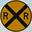

./5.jpg


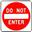

./1.jpg


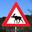

./8.jpg


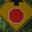

./9.jpg


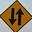

In [63]:
from IPython.display import Image, display
import glob

listOfImageNames = glob.glob('./*.jpg')

for imageName in listOfImageNames:
    print(imageName)
    display(Image(filename=imageName))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer: Some of the signs do contain english words, the meaning of which might be overlooked. Additionally, the deer crossing sign is a bit peculiar, although it serves essentially the same function as the yield sign and is a similar shape.**

SOFTMAX:  [[  4.45027774e-37   2.32874881e-05   2.72664709e-20   1.00351010e-12
    0.00000000e+00   9.97562216e-31   2.35116900e-22   1.64525925e-24
    5.08516270e-32   6.30427871e-31   3.09910710e-33   5.89345062e-09
    5.19337976e-16   1.09657800e-22   1.45797074e-07   0.00000000e+00
    1.60312558e-37   7.18345532e-28   3.87452906e-30   8.49427752e-24
    1.07772529e-30   1.30501041e-34   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.13859971e-23   1.54830474e-31   2.92550105e-19
    9.99970078e-01   2.57056879e-29   1.92462200e-28   1.45653615e-30
    4.83171411e-27   0.00000000e+00   8.31575073e-26   2.24990558e-20
    2.10226828e-13   6.45812315e-06   1.18709223e-20   1.00353186e-22
    9.87915417e-43   3.47381889e-42   0.00000000e+00]]
PREDICTION:  ./7.jpg = Children crossing


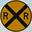

Children crossing = 0.9999700784683228
Speed limit (30km/h) = 2.3287488147616386e-05
Go straight or left = 6.458123152697226e-06
Stop = 1.4579707396933372e-07
Right-of-way at the next intersection = 5.89345061641211e-09
 
SOFTMAX:  [[  7.78986565e-31   1.66763880e-06   1.23887197e-22   3.15533318e-18
    0.00000000e+00   1.05417206e-22   1.06205431e-16   1.11110002e-19
    4.39498716e-27   1.46771703e-28   5.33461108e-29   2.89734174e-03
    5.73655186e-12   1.00712339e-21   1.21584317e-05   3.30079190e-30
    2.43875097e-36   4.73443758e-34   2.38900942e-29   3.24256653e-26
    1.66621480e-28   1.18625066e-22   3.61641435e-29   0.00000000e+00
    5.08788164e-34   7.98668933e-22   1.32893349e-29   5.08574188e-21
    3.96920659e-05   1.82400704e-27   6.43897073e-28   1.53263067e-21
    5.02070399e-21   0.00000000e+00   2.79161333e-25   3.02022227e-06
    9.21308313e-16   9.97046173e-01   8.49273217e-17   1.01270719e-18
    3.56280135e-41   1.24257255e-38   0.00000000e+00]]
PREDICTION:  

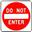

Go straight or left = 0.997046172618866
Right-of-way at the next intersection = 0.00289734173566103
Children crossing = 3.9692065911367536e-05
Stop = 1.2158431673015002e-05
Ahead only = 3.020222266059136e-06
 
SOFTMAX:  [[  1.43238636e-26   3.29168975e-01   1.62272416e-24   1.36789771e-27
    0.00000000e+00   2.14983740e-36   1.49020237e-18   3.16449974e-24
    1.04320450e-21   4.35141836e-34   9.21688510e-39   2.27107361e-11
    2.59459144e-23   4.59060298e-25   5.26271462e-01   0.00000000e+00
    3.75627126e-33   2.19330695e-31   6.92735868e-35   4.71872427e-17
    6.32774185e-22   1.97750522e-34   0.00000000e+00   0.00000000e+00
    0.00000000e+00   8.61750391e-24   1.92078285e-21   9.78180797e-30
    1.44559532e-01   7.75328567e-32   2.77147544e-26   1.49973105e-34
    4.08412674e-29   0.00000000e+00   5.20522357e-27   8.47765026e-26
    1.23353772e-14   6.16436909e-15   7.81577206e-15   1.09067548e-18
    0.00000000e+00   1.80588102e-37   0.00000000e+00]]
PREDICTION:  ./1.jpg = St

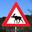

Stop = 0.5262714624404907
Speed limit (30km/h) = 0.32916897535324097
Children crossing = 0.14455953240394592
Right-of-way at the next intersection = 2.271073606952001e-11
Go straight or right = 1.2335377233281108e-14
 
SOFTMAX:  [[  2.41945108e-19   1.56513471e-02   7.11809728e-15   1.03487746e-10
    3.00361943e-28   2.12421443e-12   1.55861244e-11   1.20302470e-15
    7.94288603e-19   1.05483647e-20   7.60249790e-18   8.54169446e-09
    2.52508836e-09   1.11766874e-09   2.37515934e-07   2.64158515e-24
    2.81418921e-21   1.22764170e-15   2.59939412e-22   1.13384874e-11
    2.28599618e-17   2.43373535e-18   8.62984864e-27   1.07553535e-26
    1.18808105e-20   7.96750754e-09   1.75607350e-17   5.34993196e-11
    9.84347820e-01   4.49395130e-16   1.90439741e-17   1.51065683e-14
    1.47336384e-15   7.09374812e-32   4.11927829e-07   7.67698058e-12
    3.46367102e-10   1.50067677e-07   4.57671373e-10   4.01127786e-12
    1.34301027e-27   6.20611172e-26   2.21081852e-31]]
PREDICTION:  ./8

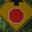

Children crossing = 0.9843478202819824
Speed limit (30km/h) = 0.015651347115635872
Turn left ahead = 4.119278287362249e-07
Stop = 2.375159340317623e-07
Go straight or left = 1.5006767739578208e-07
 
SOFTMAX:  [[  7.61480868e-31   1.26678329e-02   1.41044360e-14   7.54584277e-16
    4.44102569e-35   1.56578191e-21   8.62293483e-12   1.42197559e-17
    2.06754946e-25   7.42676002e-23   3.09446714e-25   1.06921856e-04
    1.25490851e-09   5.17942210e-21   3.08538169e-01   5.62605063e-28
    6.09726099e-30   6.45237314e-26   3.16793499e-25   5.68135603e-18
    4.97440462e-24   7.38485357e-26   7.37456691e-29   1.98929325e-38
    1.26847283e-29   1.02831941e-13   6.74979446e-24   2.67737071e-20
    1.78967804e-01   2.21051349e-24   2.77275571e-22   1.02169082e-15
    3.53780676e-19   0.00000000e+00   7.99839466e-21   1.90719433e-07
    6.14299938e-14   4.99719113e-01   1.40369202e-13   1.34139923e-16
    4.57672811e-33   1.82840285e-33   3.54066083e-41]]
PREDICTION:  ./9.jpg = Go straight o

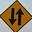

Go straight or left = 0.49971911311149597
Stop = 0.30853816866874695
Children crossing = 0.17896780371665955
Speed limit (30km/h) = 0.012667832896113396
Right-of-way at the next intersection = 0.00010692185605876148
 


In [82]:
### Run the predictions here.
import csv
data =open('signnames.csv', encoding = 'utf=8')
reader = csv.reader(data, delimiter=",")
signnames = {}
for row in reader:
    key = row[0]
    signnames[key] = row[1]


from IPython.display import Image, display


# Start a new session to show example output. 
with tf.Session(graph=graph) as session:
    # Required to get the filename matching to run.
    tf.initialize_all_variables().run()
    #image_reader = tf.WholeFileReader()

    # Get an image tensor and print its value.
    tf_img_tensors = []
    for imageName in listOfImageNames:
        www_dataset = tf.to_float(tf.image.decode_jpeg(tf.read_file(imageName)))
        www_dataset = tf.expand_dims(www_dataset, 0)

        predictions = session.run(prediction, feed_dict={graph_features:www_dataset.eval(), keep_prob: 1.0})
        print("SOFTMAX: ", predictions)
        
        prediction_keys = np.argmax(predictions, 1)
        print("PREDICTION: ", imageName, "=", signnames[str(prediction_keys[0])])
        display(Image(filename=imageName))
        
        topk = tf.nn.top_k(predictions, k=5)
        indices = topk.indices.eval().tolist()[0]
        values  = topk.values.eval().tolist()[0]
        for key, value in zip(indices, values):
            print(signnames[str(key)], "=", value)
        print(" ")

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer: No, from the top-5 probabilties it appears somewhat uncertain. Some of the top-5 predictions are approximately correct at a high-level (sometimes). NOTE: There is currently an issue with the prediction changing after each run. I am not sure why this is, but I wanted to have something to submit on the due date at least. ALSO NOTE: When submitting the first time, I was told that I was not comparing the test accuracy to the real world data accuracy in a statistical sense. I really don't know how I can compare them in any other way than a qualitative sense. These are not european traffic signs. Furthermore, sometimes they are right on a higher conceptual level. Do I count that as "correct"? I don't know. If I am being strict, then they are usually 20% to 0% accurate, which is obviously terrible, even though the test accuracy was 90% on the test set.**

In [ ]:
### Visualize the softmax probabilities here.
### ***VISUALIZED IN ABOVE CELL***


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer: In most cases the model is not very certain (no probability over 50%). Often times one of the top-5 is correct in a conceptually similar way.**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.